In [28]:
import numpy as np

In [29]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

In [30]:
import matplotlib.pyplot as plt

In [31]:
calc_popts = np.load('../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/regression_calc_popts.npy')

In [32]:
pred_popts = np.load('../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/regression_preds_popts.npy')

In [33]:
def weight_fun(x, a, b, c):
    return a + b * np.cos(x) + c * np.sin(x)

In [34]:
calc_popts.shape

(100000, 3)

In [35]:
def calculate_classes_weights(num_classes, popts):
    classes = np.linspace(0, 2, num_classes) * np.pi
    data_len = popts.shape[0]
    weights = np.zeros((data_len, num_classes))
    for i in range(data_len):
        weights[i] = weight_fun(classes, *popts[i])
    return weights

In [36]:
def calc_min_distances(pred_arg_maxs, calc_arg_maxs, num_class):
    min_distances = np.zeros(len(calc_arg_maxs))
    for i in range(len(calc_arg_maxs)):
        dist = pred_arg_maxs[i] - calc_arg_maxs[i]
        if np.abs(num_class - 1 + pred_arg_maxs[i] - calc_arg_maxs[i])<np.abs(dist):
            dist = num_class - 1 + pred_arg_maxs[i] - calc_arg_maxs[i]
        if np.abs(-num_class + 1 + pred_arg_maxs[i] - calc_arg_maxs[i])<np.abs(dist):
            dist = -num_class + 1 + pred_arg_maxs[i] - calc_arg_maxs[i]
        min_distances[i]  = dist
    return min_distances

In [49]:
def calculate_metrics(num_class, calc_popts, pred_popts):
    calc_w = calculate_classes_weights(num_class, calc_popts)
    preds_w = calculate_classes_weights(num_class, pred_popts)
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    calc_w = calc_w / np.tile(np.reshape(np.sum(calc_w, axis=1), (-1, 1)), (1, num_class))
    preds_w = calc_w / np.tile(np.reshape(np.sum(preds_w, axis=1), (-1, 1)), (1, num_class))
    min_distances = calc_min_distances(pred_arg_maxs, calc_arg_maxs, num_class)
    
    acc0 = (np.abs(min_distances) <= 0).mean()
    acc1 = (np.abs(min_distances) <= 1).mean()
    acc2 = (np.abs(min_distances) <= 2).mean()
    acc3 = (np.abs(min_distances) <= 3).mean()
    
    mean_error = np.mean(np.abs(min_distances))
    l1_delta_w = np.mean(np.abs(calc_w - preds_w))
    l2_delta_w = np.sqrt(np.mean((calc_w - preds_w)**2))
    
    return np.array([acc0, acc1, acc2, acc3, mean_error, l1_delta_w, l2_delta_w])

In [50]:
metrics = [calculate_metrics(i+2, calc_popts, pred_popts) for i in range(49)]

In [51]:
metrics = np.stack(metrics)

In [56]:
np.save( 'metrics_popts.npy', metrics,)

# Accuracy

Text(0,0.5,'Accuracy')

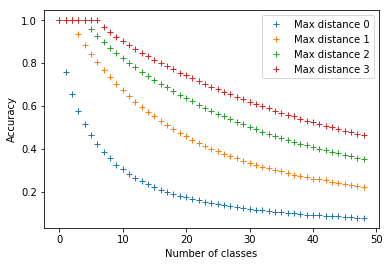

In [52]:
plt.plot(metrics[:, 0],'+', label='Max distance 0')
plt.plot(metrics[:, 1],'+', label='Max distance 1')
plt.plot(metrics[:, 2],'+', label='Max distance 2')
plt.plot(metrics[:, 3],'+', label='Max distance 3')
plt.legend(loc='upper right')
plt.xlabel('Number of classes')
plt.ylabel('Accuracy')


# L1 Distance

Text(0,0.5,'l1')

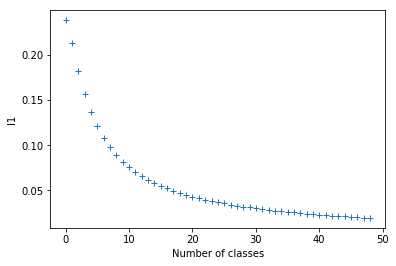

In [53]:
plt.plot(metrics[:, 5], '+')
plt.xlabel("Number of classes")
plt.ylabel('l1')

# L2 distance

Text(0,0.5,'l2')

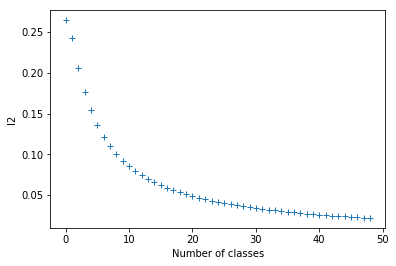

In [54]:
plt.plot(metrics[:, 6], '+')
plt.xlabel("Number of classes")
plt.ylabel('l2')

In [ ]:
def plot_distr(num_class, calc_popts, pred_popts):

    calc_w = calculate_classes_weights(num_class, calc_popts)
    preds_w = calculate_classes_weights(num_class, pred_popts)
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    
    min_distances = np.zeros(len(calc_arg_maxs))
    for i in range(len(calc_arg_maxs)):
        dist = pred_arg_maxs[i] - calc_arg_maxs[i]
        if np.abs(num_class - 1 + pred_arg_maxs[i] - calc_arg_maxs[i])<np.abs(dist):
            dist = num_class - 1 + pred_arg_maxs[i] - calc_arg_maxs[i]
        if np.abs(-num_class + 1 + pred_arg_maxs[i] - calc_arg_maxs[i])<np.abs(dist):
            dist = -num_class + 1 + pred_arg_maxs[i] - calc_arg_maxs[i]
        min_distances[i]  = dist
    
    plt.hist(min_distances, bins=num_class-1, histtype='step')
    plt.xlabel('Prediction error distance')
    

In [ ]:
i = 32
plot_distr(i, calc_popts, pred_popts)

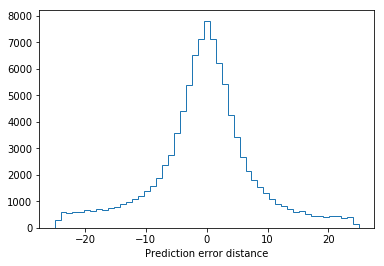

In [93]:
i = 50
plot_distr(i, calc_popts, pred_popts)

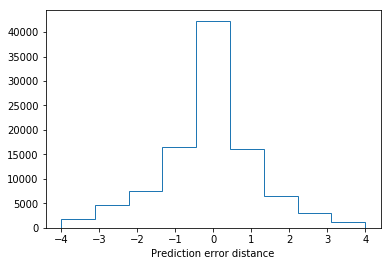

In [91]:
i = 8
plot_distr(i, calc_popts, pred_popts)

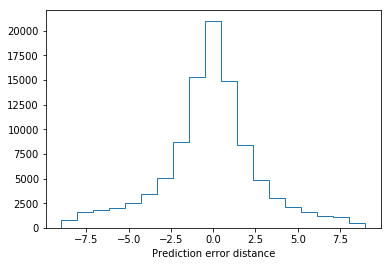

In [92]:
i = 18
plot_distr(i, calc_popts, pred_popts)

# plots

## Comment:
It may look like that "calc_popts" and "pred_popts" have different relative normalisation. But it is not true. Calc_popts and pred_popts are not normalized anywhere.

In [43]:
xs = np.linspace(0, 2*np.pi, 100)

Text(0.5,0,'Mixing angle')

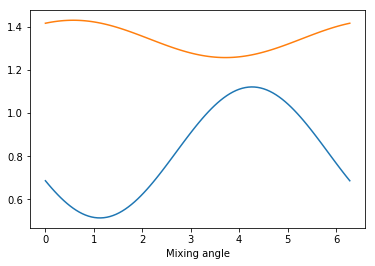

In [86]:
i=100
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))
plt.xlabel("Mixing angle")

Text(0.5,0,'Mixing angle')

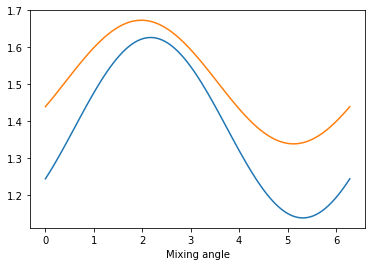

In [87]:
i=200
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))
plt.xlabel("Mixing angle")

Text(0.5,0,'Mixing angle')

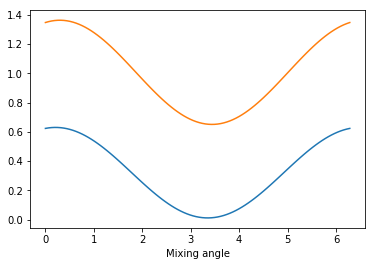

In [88]:
i=300
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))
plt.xlabel("Mixing angle")

Text(0.5,0,'Mixing angle')

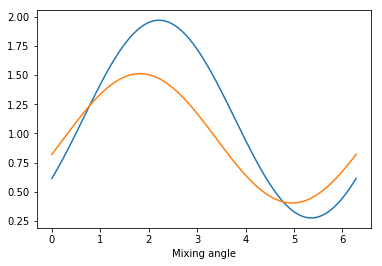

In [89]:
i=400
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))
plt.xlabel("Mixing angle")

# Distance between maximums

In [90]:
from scipy.optimize import fminbound

In [65]:
fminbound(lambda x: -weight_fun(x, *calc_popts[400]), x1=0, x2=2*np.pi)

In [67]:
max_calc = np.array([fminbound(lambda x: -weight_fun(x, *popt), x1=0, x2=2*np.pi) for popt in calc_popts])

In [68]:
max_pred = np.array([fminbound(lambda x: -weight_fun(x, *popt), x1=0, x2=2*np.pi) for popt in pred_popts])

In [78]:
min_distances = np.zeros(len(max_calc))
for i in range(len(max_calc)):
    dist = max_pred[i] - max_calc[i]
    if np.abs(2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = 2*np.pi + max_pred[i] - max_calc[i]
    if np.abs(-2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = -2*np.pi + max_pred[i] - max_calc[i]
    min_distances[i]  = dist

In [73]:
np.mean(np.abs(max_calc-max_pred))

1.18067735341287

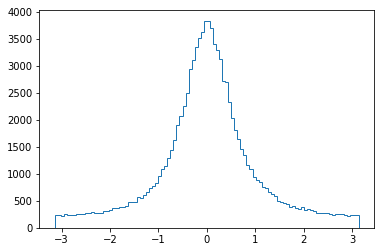

In [83]:
a=plt.hist(min_distances,histtype='step', bins=100)

# Distance between maximums - calculated using other method - for comparison

In [9]:
from cpmix_utils import calculate_arg_maxs

In [10]:
max_calc = np.array([calculate_arg_maxs(popt) for popt in calc_popts])

In [11]:
max_pred = np.array([calculate_arg_maxs(popt) for popt in pred_popts])

In [12]:
min_distances = np.zeros(len(max_calc))
for i in range(len(max_calc)):
    dist = max_pred[i] - max_calc[i]
    if np.abs(2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = 2*np.pi + max_pred[i] - max_calc[i]
    if np.abs(-2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = -2*np.pi + max_pred[i] - max_calc[i]
    min_distances[i]  = dist

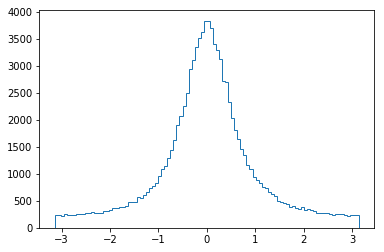

In [13]:
a=plt.hist(min_distances,histtype='step', bins=100)